In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

#Load the data from csv
titanic_data = pd.read_csv("../data/titanic.csv")

#Check the data info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
#Check the first 5 observations
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
#Check the summary statistics of the numerical variables
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
#check the missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Missing Data

Age has 177 missing data or about 20% of the dataset
Cabin has 687 missing data or about 77% of the dataset
Embarked has 2 missing data or about .2% of the dataset

In [92]:
#Based on the results from info() and .isnull().sum(), we need to handle missing values for variable Age 
#because we want to use this variable for analyis

titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

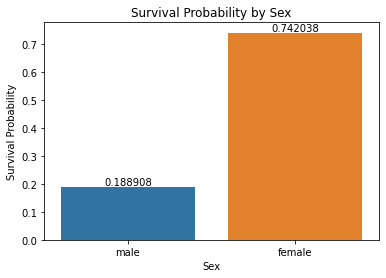

In [93]:
# First: Is there an association between Sex and Survival Probability?
# Let's show the survival rate by sex using a bar graph
ax = sns.barplot(x = 'Sex' , y = 'Survived', data = titanic_data, ci=None)
ax.bar_label(ax.containers[0])
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex')
plt.savefig("../result/sex_survived.jpg")

In [94]:
#Let's verify this association using the chi-square test of association
#First we need to build the contingency table for the chi square test
sex_cont = pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])
sex_cont

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Survived', ylabel='Sex'>

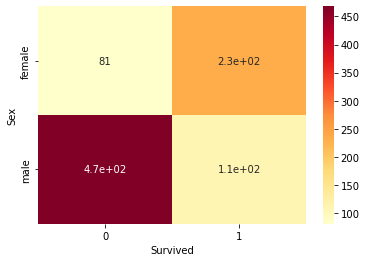

In [95]:
#visualization of the sex*survival probability contingency table
sns.heatmap(sex_cont, annot=True, cmap="YlOrRd")

In [96]:
#Perfrom chi-square test using the builtin function from scipy.stats
c, p, dof, expected = chi2_contingency(sex_cont)

In [97]:
#check the test statistic
c

260.71702016732104

In [98]:
#check the p-value
p

1.1973570627755645e-58

In [99]:
#check the degrees of freedom
dof

1

### chi-square test result (survival probability and sex)

The critical value for 1 degree of freedom is 3.841
The test statistic (260.72) is greater than the critical value (3.841). This means that there is NO association between survival probablity and sex

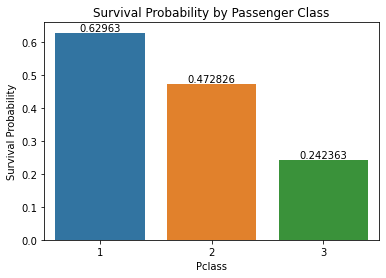

In [100]:
# Second: Is there an association between the passenger class and survival probability?
# Again, we will use the bar graph to show the survival rate according to pclass
ax = sns.barplot(x = 'Pclass' , y = 'Survived', data = titanic_data, ci=None)
ax.bar_label(ax.containers[0])
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')
plt.savefig("../result/pclass_survived.jpg")

In [107]:
#verify the association using the chi-square test
#build the contingency table for the chi-square test
pclass_cont = pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'])
pclass_cont

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

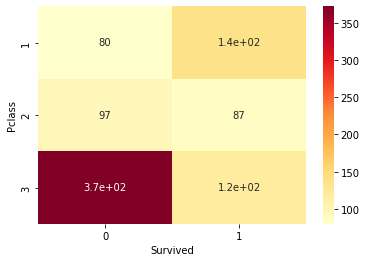

In [102]:
sns.heatmap(pclass_cont, annot=True, cmap="YlOrRd")

In [108]:
#perfom the chi-sqaure test
c, p, dof, expected = chi2_contingency(pclass_cont)

In [109]:
p

4.549251711298793e-23

In [110]:
c

102.88898875696056

In [111]:
dof

2

### chi-square test result (survival probability and pclass)

The critical value for 2 degrees of freedom is 5.991
The test statistic (102.89) is greater than the critical value (5.991). This means that there is NO association between survival probablity and passenger class

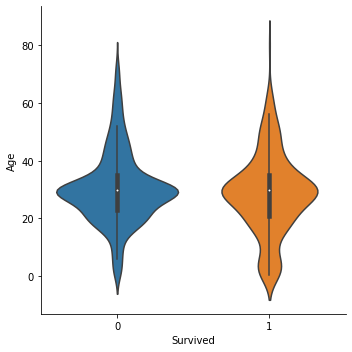

In [112]:
# Third: Is there an association between age and survival probability?
sns.catplot(x="Survived", y="Age", kind="violin", data=titanic_data)
plt.savefig("../result/age_survived.jpg")

In [113]:
#verify association using the point-biserial correlation which can be used to test relationship between 
# binary variable (in this case - survived varaible) and continuous variable (age in this case)
pointbiserialr(titanic_data['Survived'], titanic_data['Age'])

PointbiserialrResult(correlation=-0.06980851528714309, pvalue=0.037217083726811706)

### point-biserial correlation test result

The correlation is near 0 which means there is no correlation between age and survival probability